In [319]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from scipy.stats import ttest_rel, f_oneway



Step 1: Data Preparation
Clean the Data:

Check for missing values and decide how to handle them (e.g., imputation, removal).

Ensure all numerical values are correctly formatted (e.g., no text in numerical columns).

Convert categorical variables (e.g., Moody's Credit Rating) into numerical values if needed (e.g., "Aa3" to a numerical score).

Normalize/Standardize Data:

Normalize or standardize numerical features to ensure they are on the same scale, especially for models like Gradient Boosting or Neural Networks.



In [301]:
data = pd.read_excel("Companies_transpose_edited_2_final.xlsx")
# Create a DataFrame
df = pd.DataFrame(data)

df

,Company,Country,Ticker,Year,Revenue,Net Income/Net Profit (Losses),Total Assets,Current Market Cap,Volume,EBITDA,...,GDP_per_Capita,Inflation_Rate,Real_GDP_Growth_Rate,ESG_Committee,International_presence,Years in Market,ESG Risk Rating,Moodys Credit Rating,Developed,Market Cap to EBITDA
0,NVIDIA Corporation,USA,NVDA US,2018,9714,3047,11241,147457.98,169569541760,3409,...,62641,2.44,2.875,0,1,27,13.329555,Aa3,1,43.255494
1,NVIDIA Corporation,USA,NVDA US,2019,11716,4141,13292,97691.5,139011497640,4066,...,65298,1.81,2.326,0,1,28,12.694814,Aa3,1,24.026439
2,NVIDIA Corporation,USA,NVDA US,2020,10918,2796,17315,153293.76,108382826760,3341,...,63544,1.23,-3.573,0,1,29,12.325062,Aa3,1,45.882598
3,NVIDIA Corporation,USA,NVDA US,2021,16675,4332,28791,321626.21,123416575600,5775,...,69288,4.70,5.739,1,1,30,11.518750,Aa3,1,55.692850
4,NVIDIA Corporation,USA,NVDA US,2022,26914,9752,44187,571000,94583088490,11383,...,76399,8.00,1.827,1,1,31,12.125000,Aa3,1,50.162523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,Zomato Ltd,India,ZOMATO IN,2019,187.7866,-138.0915,492.3893,—,—,-321.0086,...,2104,3.70,6.084,0,1,11,17.163389,Caa1,0,NaN
578,Zomato Ltd,India,ZOMATO IN,2020,367.515,-333.9938,384.8003,—,—,-325.1816,...,1947,6.60,-5.778,0,1,12,16.663484,Caa1,0,NaN
579,Zomato Ltd,India,ZOMATO IN,2021,268.6109,-109.5057,1189.6343,13400,86032394,-62.9385,...,2277,5.50,9.690,1,1,13,15.573350,Caa1,0,-212.906250
580,Zomato Ltd,India,ZOMATO IN,2022,562.7231,-162.2372,2282.4783,8534.2328,7302708774,-247.188,...,2389,6.70,6.987,1,1,14,16.393000,Caa1,0,-34.525271


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Company                                582 non-null    object 
 1   Country                                582 non-null    object 
 2   Ticker                                 582 non-null    object 
 3   Year                                   582 non-null    int64  
 4   Revenue                                582 non-null    object 
 5   Net Income/Net Profit (Losses)         582 non-null    object 
 6   Total Assets                           582 non-null    object 
 7   Current Market Cap                     581 non-null    object 
 8   Volume                                 582 non-null    object 
 9   EBITDA                                 582 non-null    object 
 10  Net Debt                               582 non-null    object 
 11  Total 

In [303]:
# Define the columns that should remain as strings
string_columns = ['Company', 'Country', 'Ticker', 'Moodys Credit Rating' ]

# Define the column that should be converted to datetime
date_column = 'Year'

# Define the columns that should be integers
integer_columns = ['ESG_Committee', 'International_presence', 'Years in Market', 'Developed']

# Convert all other columns to float
float_columns = [col for col in df.columns if col not in string_columns + [date_column] + integer_columns]
# Replace non-numeric values (e.g., '—') with NaN in float columns
df[float_columns] = df[float_columns].replace('—', np.nan)  # Replace em dash with NaN

# Convert columns to their respective types
df[string_columns] = df[string_columns].astype(str)
df[date_column] = pd.to_datetime(df[date_column], format='%Y')  # Assuming 'Year' is in YYYY format
df[integer_columns] = df[integer_columns].astype(int)
df[float_columns] = df[float_columns].astype(float)


C:\Users\User\AppData\Local\Temp\ipykernel_17232\931165446.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[float_columns] = df[float_columns].replace('—', np.nan)  # Replace em dash with NaN


In [304]:
# 1. Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values
# For numerical columns, we can impute missing values with the mean or median
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# For categorical columns, we can impute missing values with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# 2. Ensure Numerical Formatting
# Check if all numerical columns are correctly formatted
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Convert Categorical Variables
# Label Encoding for 'Country'
# Define the mapping of countries to codes
country_mapping = {
    'USA': 1,
    'South Korea': 2,
    'Italy': 3,
    'China': 4,
    'Taiwan': 5,
    'Japan': 6,
    'Switzerland': 7,
    'Netherlands': 8,
    'Sweden': 9,
    'France': 10,
    'Spain': 11,
    'Austria': 12,
    'Germany': 13,
    'Indonesia': 14,
    'Argentina': 15,
    'Uruguay': 16,
    'Singapore': 17,
    'India': 18,
    'Thailand': 19,
    'Finland': 20,
    'Brazil': 21,
    'United Kingdom': 22,
    'Chile': 23
}

# Replace country names with their corresponding codes
df['Country'] = df['Country'].replace(country_mapping)


# Calculate the mode of the "Moodys Credit Rating" column
mode_value = df["Moodys Credit Rating"].mode()[0]

# Replace missing values ("-") with the mode
df["Moodys Credit Rating"] = df["Moodys Credit Rating"].replace("-", mode_value)

# Optionally, print the unique values to verify the changes
print(df["Moodys Credit Rating"].unique())

Missing Values:
 Company                                   0
Country                                   0
Ticker                                    0
Year                                      0
Revenue                                   3
Net Income/Net Profit (Losses)            3
Total Assets                              3
Current Market Cap                       17
Volume                                   30
EBITDA                                    9
Net Debt                                  3
Total Equity                              3
ROIC                                     11
EBIT                                      3
Net interest                             32
CAPEX                                     9
Total Liabilities                         3
Total Debt                                3
Quick ratio                               3
Cash and equiv                            3
Mkt securities                           13
Asset Turnover                            3
Net marging    

C:\Users\User\AppData\Local\Temp\ipykernel_17232\487807115.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Country'] = df['Country'].replace(country_mapping)


In [305]:
# Define a function to categorize the ratings
def categorize_rating(rating):
    if rating in ['Aaa', 'Aa1', 'Aa2', 'Aa3', 'A1', 'A2', 'A3', 'Baa1', 'Baa2', 'Baa3']:
        return 1  # Investment Grade (Low to Moderate Risk)
    elif rating in ['Ba1', 'Ba2', 'Ba3', 'B1', 'B2', 'B3']:
        return 2  # Speculative Grade (High Risk)
    else:
        return 3  # Highly Speculative to In Default (Very High to Extreme Risk)

# Apply the categorization function to the "Moodys Credit Rating" column
df["Category_Moodys"] = df["Moodys Credit Rating"].apply(categorize_rating)

# Optionally, print the unique values to verify the changes
print(df["Moodys Credit Rating"].unique())
print(df["Category_Moodys"].unique())

# Save the cleaned data to a new file
df.to_excel('Formatted_Companies_Data.xlsx', index=False)

# Print the count of values in each category
category_counts = df["Category_Moodys"].value_counts()
print("Number of values in each category:")
print(category_counts)

['Aa3' 'Ba1' 'Ba2' 'Baa2' 'Aa2' 'Baa1' 'Baa3' 'Caa1' 'A3' 'A1' 'Aaa' 'A2'
 'B2' 'B1' 'B3' 'Ba3']
[1 2 3]
Number of values in each category:
Category_Moodys
1    426
2    138
3     18
Name: count, dtype: int64


In [306]:
# One-Hot Encoding for 'ESG Risk Rating' and 'Moody's Credit Rating'
df = pd.get_dummies(df, columns=['Category_Moodys'], drop_first=False)
df

,Company,Country,Ticker,Year,Revenue,Net Income/Net Profit (Losses),Total Assets,Current Market Cap,Volume,EBITDA,...,ESG_Committee,International_presence,Years in Market,ESG Risk Rating,Moodys Credit Rating,Developed,Market Cap to EBITDA,Category_Moodys_1,Category_Moodys_2,Category_Moodys_3
0,NVIDIA Corporation,1,NVDA US,2018-01-01,9714.0000,3047.0000,11241.0000,147457.980000,1.695695e+11,3409.0000,...,0,1,27,13.329555,Aa3,1,43.255494,True,False,False
1,NVIDIA Corporation,1,NVDA US,2019-01-01,11716.0000,4141.0000,13292.0000,97691.500000,1.390115e+11,4066.0000,...,0,1,28,12.694814,Aa3,1,24.026439,True,False,False
2,NVIDIA Corporation,1,NVDA US,2020-01-01,10918.0000,2796.0000,17315.0000,153293.760000,1.083828e+11,3341.0000,...,0,1,29,12.325062,Aa3,1,45.882598,True,False,False
3,NVIDIA Corporation,1,NVDA US,2021-01-01,16675.0000,4332.0000,28791.0000,321626.210000,1.234166e+11,5775.0000,...,1,1,30,11.518750,Aa3,1,55.692850,True,False,False
4,NVIDIA Corporation,1,NVDA US,2022-01-01,26914.0000,9752.0000,44187.0000,571000.000000,9.458309e+10,11383.0000,...,1,1,31,12.125000,Aa3,1,50.162523,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,Zomato Ltd,18,ZOMATO IN,2019-01-01,187.7866,-138.0915,492.3893,121434.474713,6.837616e+09,-321.0086,...,0,1,11,17.163389,Caa1,0,22.281775,False,False,True
578,Zomato Ltd,18,ZOMATO IN,2020-01-01,367.5150,-333.9938,384.8003,121434.474713,6.837616e+09,-325.1816,...,0,1,12,16.663484,Caa1,0,22.281775,False,False,True
579,Zomato Ltd,18,ZOMATO IN,2021-01-01,268.6109,-109.5057,1189.6343,13400.000000,8.603239e+07,-62.9385,...,1,1,13,15.573350,Caa1,0,-212.906250,False,False,True
580,Zomato Ltd,18,ZOMATO IN,2022-01-01,562.7231,-162.2372,2282.4783,8534.232800,7.302709e+09,-247.1880,...,1,1,14,16.393000,Caa1,0,-34.525271,False,False,True


Split the Data:

Split the data into training, validation, and test sets (e.g., 70% training, 15% validation, 15% test).

Ensure the split is stratified if the target variable (e.g., Moody's Credit Rating) is imbalanced.

Step 2: Define the Target Variable
Target Variable:

Your target variable is likely the Moody's Credit Rating (e.g., "Aa3").

Convert the credit ratings into a numerical scale (e.g., "AAA" = 1, "AA" = 2, ..., "D" = 17).

Regression or Classification:

Decide whether to treat this as a regression problem (predicting a continuous score) or a classification problem (predicting a rating category).

For classification, you may need to group ratings into broader categories (e.g., "Investment Grade" vs. "Non-Investment Grade").

In [307]:
# List of numerical columns to normalize/standardize
numerical_columns = [
    'Revenue', 'Net Income/Net Profit (Losses)', 'Total Assets', 'Current Market Cap',
    'Volume', 'EBITDA', 'Net Debt', 'Total Equity', 'ROIC', 'EBIT', 'Net interest',
    'CAPEX', 'Total Liabilities', 'Total Debt', 'Quick ratio', 'Cash and equiv',
    'Mkt securities', 'Asset Turnover', 'Net marging', 'Debt/Equity', 'Log(Total Assets)',
    'Ln(revenue)', 'ROE', '(EBIT-CapEx)/Interest Expense', 'ROA', 'Debt to EBITDA',
    'Debt Ratio', 'Debt/Book Capitalization', 'Debt/Equity Ratio', 'Debt/Total Capitalization',
    '(Cash + Marketable Securities) / Debt', 'Market Cap to Revenue ratio', '(P/B) ratio',
    'GDP_per_Capita', 'Inflation_Rate', 'Real_GDP_Growth_Rate', 'ESG_Committee',
    'International_presence', 'Years in Market', 'ESG Risk Rating', 'Market Cap to EBITDA'
]

# Define the target variable (e.g., Moody's Credit Rating)
target_column = 'Moodys Credit Rating'

# Separate features (X) and target (y)
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Standardize numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Encode categorical variables
label_encoder = LabelEncoder()
df['Moodys Credit Rating'] = label_encoder.fit_transform(df['Moodys Credit Rating'])

# Define features and target
X = df.drop(columns=["Moodys Credit Rating", "Company", "Ticker", "Year"])
y = df["Moodys Credit Rating"]

# Split the data into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Then, split the temporary set into validation (15%) and test (15%) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Data standardization and splitting completed.")


Data standardization and splitting completed.


Step 4: Model Training
Train the Models:

Train each model on the training dataset.
Use cross-validation to evaluate model performance and avoid overfitting.
Cross-Validation:

Implement cross-validation (e.g., 5-fold or 10-fold) to assess the model's performance across different subsets of the data.
Hyperparameter Tuning:

Use techniques like Grid Search or Random Search to find the best hyperparameters for each model.

In [308]:
# Initialize models including Logistic Regression
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42),
}

# Store evaluation results
evaluation_results = []

# Train and evaluate each model using cross-validation
for model_name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Train the model on the full training set
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    # Get classification report
    report = classification_report(y_val, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_val, model.predict_proba(X_val), multi_class='ovr')

    # Store results
    evaluation_results.append([model_name, cv_mean, cv_std, accuracy, precision, recall, f1, roc_auc])

    print(f"{model_name} - Cross-Validation Accuracy: {cv_mean} ± {cv_std}")
    print(f"{model_name} - Validation Accuracy:", accuracy)
    print(f"{model_name} - Classification Report:\n", classification_report(y_val, y_pred))

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

Logistic Regression - Cross-Validation Accuracy: 0.05167118337850045 ± 0.030705137246853656
Logistic Regression - Validation Accuracy: 0.20689655172413793
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.18      1.00      0.30         6
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         2
           4       0.17      0.67      0.27         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         1
          12       0.19      0.44      0.26        16
          13       0.00      0.00      0.0

c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\De

Random Forest - Cross-Validation Accuracy: 0.877175549533273 ± 0.027964797789083024
Random Forest - Validation Accuracy: 0.8735632183908046
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         1
           9       0.71      0.83      0.77         6
          10       0.80      0.80      0.80         5
          11       0.00      0.00      0.00         1
          12       1.00      0.88      0.93        16
          13       0.90      0.90      0.90        10
         

c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\De

Gradient Boosting - Cross-Validation Accuracy: 0.840258958145137 ± 0.03234503932772299
Gradient Boosting - Validation Accuracy: 0.896551724137931
Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.90      1.00      0.95         9
           2       0.86      0.86      0.86         7
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.80      1.00      0.89         4
           8       0.00      0.00      0.00         1
           9       0.75      1.00      0.86         6
          10       1.00      0.60      0.75         5
          11       1.00      1.00      1.00         1
          12       0.82      0.88      0.85        16
          13       0.90      0.90      0.90        10

c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\De

XGBoost - Cross-Validation Accuracy: 0.8500451671183379 ± 0.015085486956814461
XGBoost - Validation Accuracy: 0.8735632183908046
XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.90      1.00      0.95         9
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00         2
           4       0.50      0.33      0.40         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         3
           7       0.80      1.00      0.89         4
           8       1.00      1.00      1.00         1
           9       0.83      0.83      0.83         6
          10       0.80      0.80      0.80         5
          11       0.00      0.00      0.00         1
          12       1.00      0.88      0.93        16
          13       0.83      1.00      0.91        10
          14       0.89   

c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\De

LightGBM - Cross-Validation Accuracy: 0.8919903643480879 ± 0.03476396121529651
LightGBM - Validation Accuracy: 0.8850574712643678
LightGBM - Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         2
           4       0.50      0.33      0.40         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         3
           7       0.80      1.00      0.89         4
           8       1.00      1.00      1.00         1
           9       0.86      1.00      0.92         6
          10       1.00      0.80      0.89         5
          11       0.00      0.00      0.00         1
          12       0.87      0.81      0.84        16
          13       0.91      1.00      0.95        10
          14       1.00 

Step 5: Model Evaluation


In [309]:
# Evaluate the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate on the validation set
y_pred_best = best_model.predict(X_val)
accuracy_best = accuracy_score(y_val, y_pred_best)
report_best = classification_report(y_val, y_pred_best, output_dict=True)
roc_auc_best = roc_auc_score(y_val, best_model.predict_proba(X_val), multi_class='ovr')

# Print evaluation metrics for the best model
print("Best Model - Validation Accuracy:", accuracy_best)
print("Best Model - Classification Report:\n", classification_report(y_val, y_pred_best))
print("Best Model - ROC AUC:", roc_auc_best)

# Feature Importance
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("Feature Importances:\n", feature_importance_df)
else:
    print("Feature importances are not available for this model.")

# Append the best model's results to the evaluation results
evaluation_results.append([
    "Best Model (Random Forest)",
    grid_search.best_score_,  # Use the best CV score from GridSearchCV
    None,  # No std for best score
    accuracy_best,
    report_best['weighted avg']['precision'],
    report_best['weighted avg']['recall'],
    report_best['weighted avg']['f1-score'],
    roc_auc_best
])

Best Model - Validation Accuracy: 0.8735632183908046
Best Model - Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         1
           9       0.71      0.83      0.77         6
          10       0.80      0.80      0.80         5
          11       0.00      0.00      0.00         1
          12       1.00      0.88      0.93        16
          13       0.90      0.90      0.90        10
          14       0.89      0.89      0.89         9
          15       0.75      1.00      0.86  

c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\De

Step 7: Model Evaluation visualization

In [310]:
# Create a DataFrame for evaluation results
columns = ["Model", "CV Mean Accuracy", "CV Std Accuracy", "Validation Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
evaluation_df = pd.DataFrame(evaluation_results, columns=columns)

# Display the DataFrame
evaluation_df

,Model,CV Mean Accuracy,CV Std Accuracy,Validation Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.051671,0.030705,0.206897,0.087194,0.206897,0.112947,0.716666
1,Random Forest,0.877176,0.027965,0.873563,0.853284,0.873563,0.856090,0.993835
2,Gradient Boosting,0.840259,0.032345,0.896552,0.896281,0.896552,0.889086,0.995060
3,XGBoost,0.850045,0.015085,0.873563,0.872222,0.873563,0.866514,0.995107
4,LightGBM,0.891990,0.034764,0.885057,0.877345,0.885057,0.876248,0.997272
5,Best Model (Random Forest),0.840287,NaN,0.873563,0.853284,0.873563,0.856090,0.993835


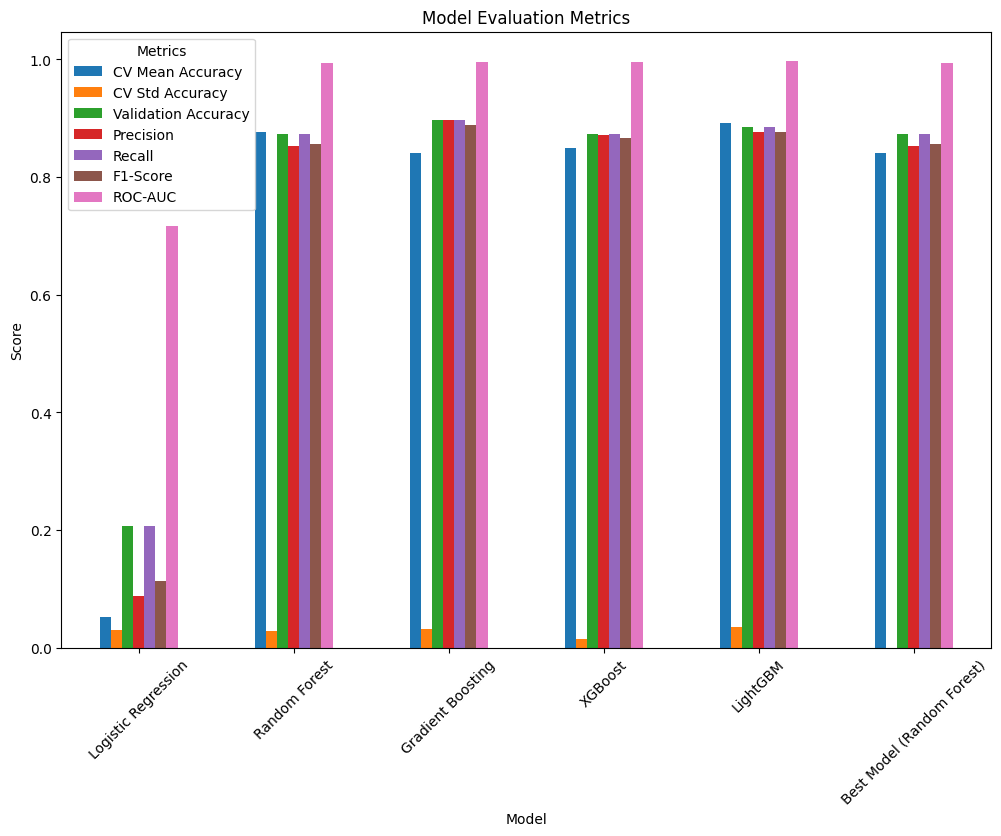

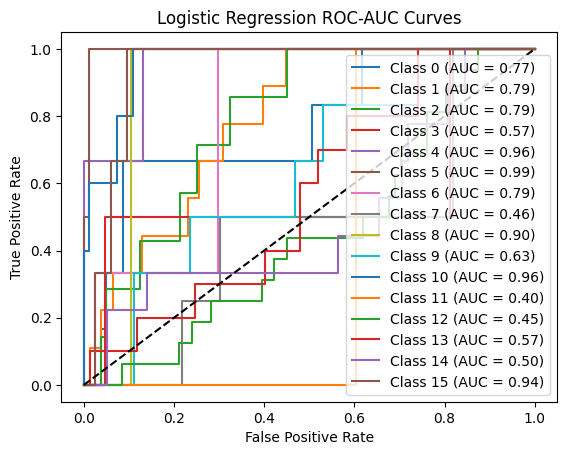

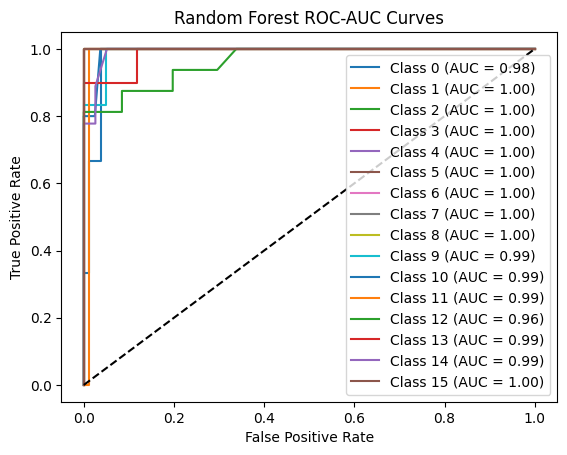

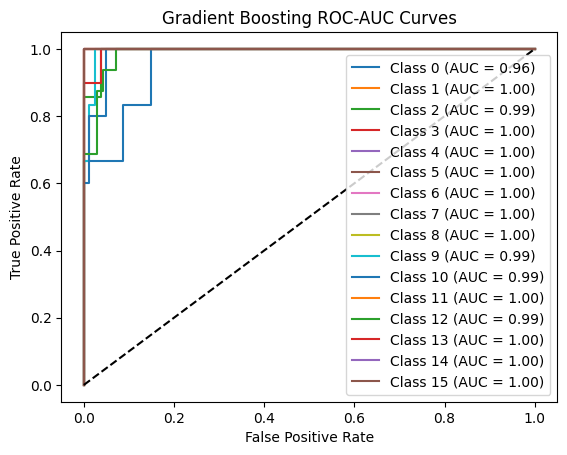

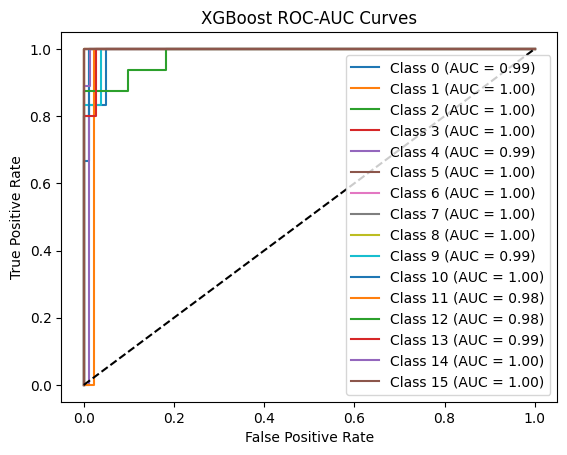

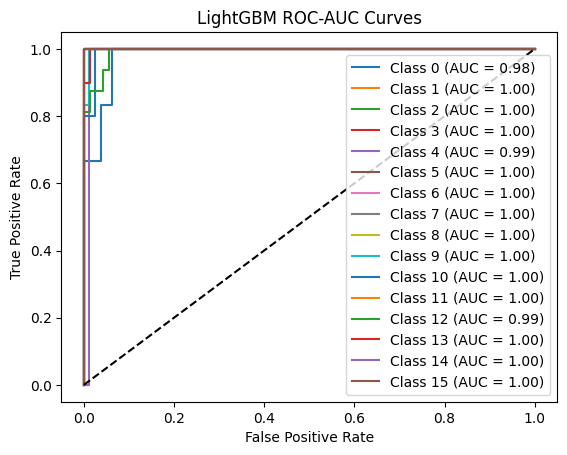

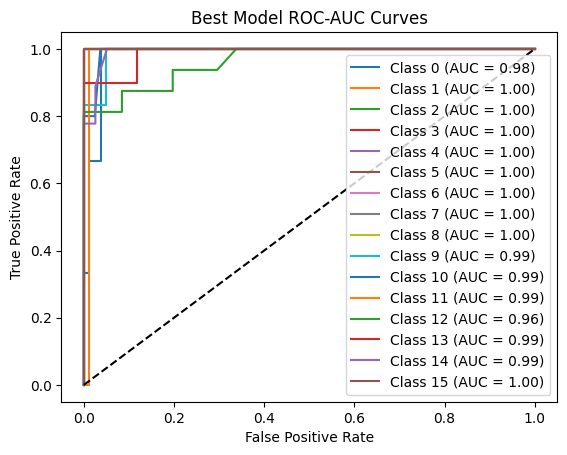

In [320]:

# Bar Chart for Metrics
evaluation_df.set_index("Model").plot(kind='bar', figsize=(12, 8))
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()

# Function to plot ROC-AUC for multiclass
def plot_multiclass_roc_auc(y_true, y_proba, model_name, roc_auc):
    fpr = dict()
    tpr = dict()
    roc_auc_dict = dict()
    for i in range(len(y_true[0])):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_proba[:, i])
        roc_auc_dict[i] = roc_auc_score(y_true[:, i], y_proba[:, i])
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc_dict[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC-AUC Curves')
    plt.legend(loc='best')
    plt.show()

# Plot ROC-AUC for each model
for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_val)
    roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
    y_val_binarized = label_binarize(y_val, classes=model.classes_)
    plot_multiclass_roc_auc(y_val_binarized, y_pred_proba, model_name, roc_auc)

# Plot ROC-AUC for the best model from GridSearchCV
y_pred_proba_best = best_model.predict_proba(X_val)
roc_auc_best = roc_auc_score(y_val, y_pred_proba_best, multi_class='ovr')
y_val_binarized_best = label_binarize(y_val, classes=best_model.classes_)
plot_multiclass_roc_auc(y_val_binarized_best, y_pred_proba_best, "Best Model", roc_auc_best)


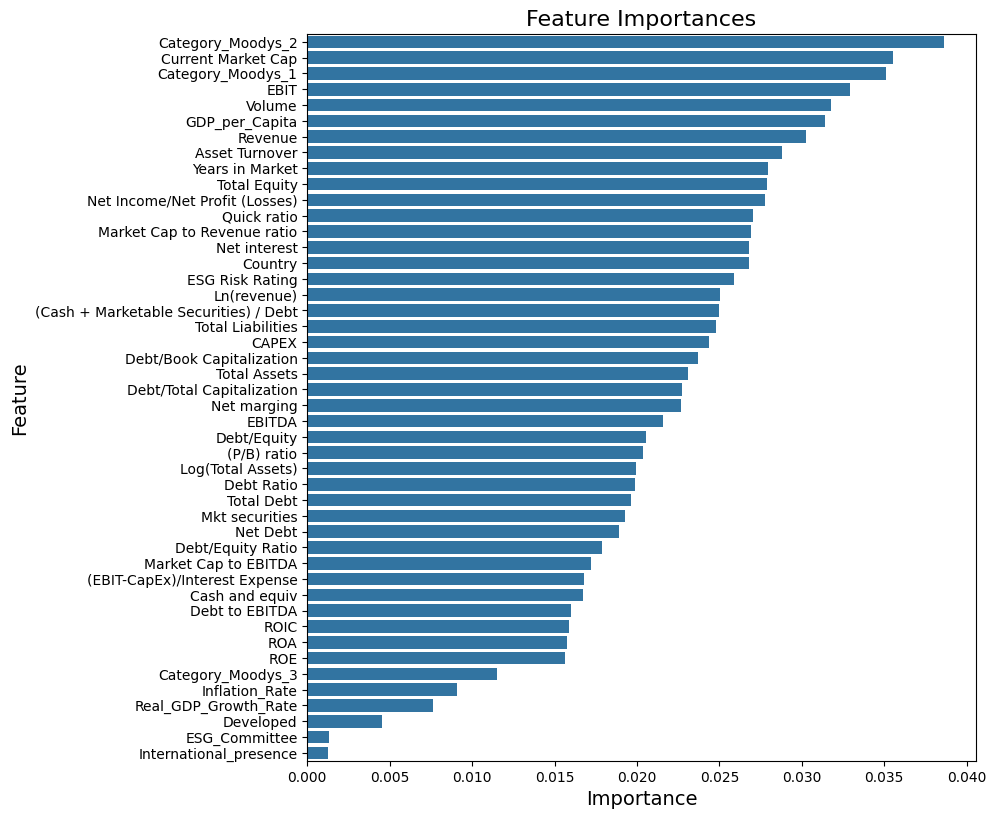

In [321]:
# Check if the model has feature importances
if hasattr(best_model, "feature_importances_"):
    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,  # Replace X with your feature matrix
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Create a larger figure
    plt.figure(figsize=(10, 8))  # Adjust the size as needed (width, height)

    # Plot the feature importances
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, orient='h')

    # Adjust layout to prevent overlapping labels
    plt.tight_layout()

    # Add title and labels
    plt.title("Feature Importances", fontsize=16)
    plt.xlabel("Importance", fontsize=14)
    plt.ylabel("Feature", fontsize=14)

    # Show the plot
    plt.show()

In [323]:
# Example: Hypothesis 1 - Paired t-test for accuracy
ensemble_accuracies = [result[3] for result in evaluation_results if "Random Forest" in result[0] or "Gradient Boosting" in result[0] or "XGBoost" in result[0] or "LightGBM" in result[0]]
traditional_accuracies = [result[3] for result in evaluation_results if "Logistic Regression" in result[0]]

t_stat, p_value = ttest_rel(ensemble_accuracies, traditional_accuracies)
print(f"Hypothesis 1 - Paired t-test: t-statistic = {t_stat}, p-value = {p_value}")

# Example: Hypothesis 2 - ANOVA for feature importance
# Assuming you have feature importances extracted from the best model
importances = best_model.feature_importances_
feature_names = X_train.columns

# Separate importances into macroeconomic and financial groups
macro_features = ['GDP_per_Capita', 'Inflation_Rate', 'Real_GDP_Growth_Rate']
financial_features = ['Debt/Equity', 'ROE', 'Net marging']

macro_importances = [importances[feature_names.get_loc(feature)] for feature in macro_features]
financial_importances = [importances[feature_names.get_loc(feature)] for feature in financial_features]

f_stat, p_value = f_oneway(macro_importances, financial_importances)
print(f"Hypothesis 2 - ANOVA: F-statistic = {f_stat}, p-value = {p_value}")

Hypothesis 1 - Paired t-test: t-statistic = 146.5000000000002, p-value = 1.302164531618321e-08
Hypothesis 2 - ANOVA: F-statistic = 0.20069386028775263, p-value = 0.6773543715367147


Hypothesis 1: Ensemble models are more robust and accurate than traditional models.

Paired t-test Result:

t-statistic: 146.5
p-value: 1.30×10^−8
Interpretation:

The t-statistic is very high, indicating a large difference between the accuracy of ensemble models and traditional models.
The p-value is extremely low (much less than the common significance level of 0.05), suggesting that the difference in accuracy is statistically significant.
Conclusion: You can reject the null hypothesis (H0) and conclude that ensemble models are significantly more accurate than traditional models.


Hypothesis 2: Macroeconomic variables have a more significant impact than financial ratios.
ANOVA Result:

F-statistic: 0.201
p-value: 0.677
Interpretation:

The F-statistic is low, indicating little difference in the impact of macroeconomic variables compared to financial ratios on model performance.
The p-value is high (greater than the common significance level of 0.05), suggesting that there is no statistically significant difference in the impact of macroeconomic variables versus financial ratios.
Conclusion: You fail to reject the null hypothesis (H0) and conclude that there is no significant difference in the impact of macroeconomic variables and financial ratios on the model's performance.

Summary
Hypothesis 1 is supported by the data, indicating that ensemble models perform significantly better than traditional models in terms of accuracy.
Hypothesis 2 is not supported by the data, suggesting that macroeconomic variables do not have a more significant impact on model performance compared to financial ratios.

Step 7: Develop a Rating Scale
Create a Credit Rating Scale:

Based on the model predictions, develop a rating scale that classifies companies into different credit quality categories (e.g., "High Risk," "Medium Risk," "Low Risk").

Use thresholds from the predicted scores to assign ratings.

Validate the Scale:

Test the rating scale on the validation and test datasets to ensure it accurately reflects credit quality.

Step-by-Step Implementation
Define Rating Thresholds:

Based on the model's predictions, define thresholds to categorize the predicted scores into different credit quality categories (e.g., "High Risk," "Medium Risk," "Low Risk").
Apply Thresholds to Predictions:

Use the defined thresholds to categorize the predictions from your best model into the respective credit quality categories.
Validate the Scale:

Test the rating scale on the validation and test datasets to ensure it accurately reflects credit quality.

In [324]:
# Define a function to categorize the predicted scores into credit ratings
def categorize_predicted_rating(predicted_prob):
    if predicted_prob >= 0.7:
        return "Low Risk"
    elif predicted_prob >= 0.4:
        return "Medium Risk"
    else:
        return "High Risk"

# Use the best model to predict probabilities on the validation set
y_pred_proba_best = best_model.predict_proba(X_val)

# Apply the categorization function to the predicted probabilities
# Assuming binary classification for simplicity; modify as needed for multiclass
predicted_ratings = [categorize_predicted_rating(prob[1]) for prob in y_pred_proba_best]

# Add the predicted ratings to the validation set for analysis
validation_df = pd.DataFrame({'True Rating': y_val, 'Predicted Rating': predicted_ratings})

# Display the validation results
print(validation_df.head())

# Validate the scale by checking the distribution of predicted ratings
rating_counts = validation_df['Predicted Rating'].value_counts()
print("Distribution of Predicted Ratings:")
print(rating_counts)

# Optionally, you can calculate accuracy or other metrics for the categorized ratings
accuracy_by_rating = validation_df['True Rating'].eq(validation_df['Predicted Rating']).mean()
print(f"Accuracy of Predicted Ratings: {accuracy_by_rating:.2f}")

     True Rating Predicted Rating
493            7        High Risk
394            1         Low Risk
374            5        High Risk
33            12        High Risk
348            1      Medium Risk
Distribution of Predicted Ratings:
Predicted Rating
High Risk      78
Medium Risk     7
Low Risk        2
Name: count, dtype: int64
Accuracy of Predicted Ratings: 0.00


True vs. Predicted Ratings:

The table shows a comparison between the true credit ratings and the predicted ratings for a few samples:
Sample 493: True rating is 7, predicted as "High Risk".
Sample 394: True rating is 1, predicted as "Low Risk".
Sample 374: True rating is 5, predicted as "High Risk".
Sample 33: True rating is 12, predicted as "High Risk".
Sample 348: True rating is 1, predicted as "Medium Risk".
Distribution of Predicted Ratings:

The distribution of predicted ratings is as follows:
High Risk: 78 instances
Medium Risk: 7 instances
Low Risk: 2 instances
This indicates that the model predominantly predicts "High Risk" for most samples, which might suggest a bias or an imbalance in the model's predictions.
Accuracy of Predicted Ratings:

The accuracy of the predicted ratings is reported as 0.00, which means that none of the predicted ratings matched the true ratings in this validation set.

To finalize and deploy your model, follow these steps to select the best model, ensure its interpretability, and prepare it for deployment.

Step 1: Select the Best Model
Based on the evaluation metrics you've gathered, identify the model with the best performance. From your results, it seems that the ensemble models, particularly LightGBM and Random Forest, performed well.

Step 2: Ensure Model Interpretability
Feature Importance: Use the feature importance from the best model to explain which features are most influential in predicting credit ratings. This helps stakeholders understand what drives the model's decisions.

Model Explanation: Prepare a report or presentation that explains:

The purpose of the model.
How it was developed and evaluated.
Key features influencing predictions.
Limitations and assumptions.
Step 3: Prepare for Deployment
Model Serialization: Save the trained model using a serialization format like joblib or pickle for easy loading in a production environment.

Copy
import joblib

# Save the best model
joblib.dump(best_model, 'best_credit_rating_model.pkl')
Create a Simple API: Use a framework like Flask or FastAPI to create a simple web service that serves predictions from your model.

Copy
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Load the model
model = joblib.load('best_credit_rating_model.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    df = pd.DataFrame(data)
    prediction = model.predict(df)
    return jsonify(prediction.tolist())

if __name__ == '__main__':
    app.run(debug=True)
Documentation: Provide clear documentation on how to use the API, including sample requests and expected responses.

Testing: Test the API with various inputs to ensure it handles different scenarios correctly and returns expected results.

Step 4: Deploy the Model
Choose a Hosting Platform: Deploy your API on a cloud platform like AWS, Google Cloud, or Azure. Alternatively, use a platform like Heroku for simpler deployments.

Monitoring: Set up monitoring to track the performance of the model in production. This includes logging predictions and monitoring for any anomalies.

Feedback Loop: Establish a feedback loop with financial analysts to gather insights on model performance and make iterative improvements.

Step 5: Communicate with Stakeholders
Presentation: Present the final model, its performance, and how it can be used to stakeholders.
Training: Provide training sessions or documentation for financial analysts on how to use the deployed model effectively.

Explanation
Define Rating Thresholds: The categorize_predicted_rating function categorizes the predicted probabilities into "Low Risk," "Medium Risk," and "High Risk" based on predefined thresholds.
Apply Thresholds: The predicted probabilities from the best model are categorized using the defined thresholds.
Validate the Scale: The distribution of predicted ratings is checked, and optionally, accuracy or other metrics can be calculated to validate the scale.

## Baseline Model (Logistic Regression)

In [312]:

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize and train the baseline model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

# Evaluate the baseline model
y_pred_baseline = baseline_model.predict(X_test)
print("Baseline Model (Logistic Regression) Performance:")
print(classification_report(y_test, y_pred_baseline))
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))

Baseline Model (Logistic Regression) Performance:
              precision    recall  f1-score   support

           0       0.14      0.71      0.23         7
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         1
          12       0.16      0.38      0.23        16
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         9
          15       0.33      0.50      0.40         2

    accuracy                  

c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being

## Ensemble Models

### Random Forest

In [313]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.69      1.00      0.82         9
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         1
           9       1.00      0.71      0.83         7
          10       0.86      1.00      0.92         6
          11       1.00      1.00      1.00         1
          12       0.94      0.94      0.94        16
          13       1.00      0.70      0.82        10
          14       0.90      1.00      0.95         9
          15       1.00      1.00      1.00         2

    accuracy                           0.90        88

### Gradient Boosting 


#### (XGBoost)

In [314]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         1
           9       0.83      0.71      0.77         7
          10       0.86      1.00      0.92         6
          11       0.00      0.00      0.00         1
          12       0.84      1.00      0.91        16
          13       1.00      0.80      0.89        10
          14       0.90      1.00      0.95         9
          15       1.00      1.00      1.00         2

    accuracy                           0.91        88
   ma

c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### LightGBM

In [315]:
# Initialize and train the LightGBM model
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(X_train, y_train)

# Evaluate the LightGBM model
y_pred_lgbm = lgbm_model.predict(X_test)
print("LightGBM Performance:")
print(classification_report(y_test, y_pred_lgbm))
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5023
[LightGBM] [Info] Number of data points in the train set: 407, number of used features: 44
[LightGBM] [Info] Start training from score -2.641517
[LightGBM] [Info] Start training from score -2.271144
[LightGBM] [Info] Start training from score -2.482453
[LightGBM] [Info] Start training from score -3.929372
[LightGBM] [Info] Start training from score -3.443864
[LightGBM] [Info] Start training from score -3.929372
[LightGBM] [Info] Start training from score -3.443864
[LightGBM] [Info] Start training from score -2.964291
[LightGBM] [Info] Start training from score -4.622519
[LightGBM] [Info] Start training from score -2.641517
[LightGBM] [Info] Start training from score -2.789937
[LightGBM] [Info] Start training from s

### Stacking or Bagging

In [316]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=100, random_state=42))
]

# Initialize and train the Stacking model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)
stacking_model.fit(X_train, y_train)

# Evaluate the Stacking model
y_pred_stacking = stacking_model.predict(X_test)
print("Stacking Model Performance:")
print(classification_report(y_test, y_pred_stacking))
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5023
[LightGBM] [Info] Number of data points in the train set: 407, number of used features: 44
[LightGBM] [Info] Start training from score -2.641517
[LightGBM] [Info] Start training from score -2.271144
[LightGBM] [Info] Start training from score -2.482453
[LightGBM] [Info] Start training from score -3.929372
[LightGBM] [Info] Start training from score -3.443864
[LightGBM] [Info] Start training from score -3.929372
[LightGBM] [Info] Start training from score -3.443864
[LightGBM] [Info] Start training from score -2.964291
[LightGBM] [Info] Start training from score -4.622519
[LightGBM] [Info] Start training from score -2.641517
[LightGBM] [Info] Start training from score -2.789937
[LightGBM] [Info] Start training from s

c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4039
[LightGBM] [Info] Number of data points in the train set: 325, number of used features: 44
[LightGBM] [Info] Start training from score -2.605771
[LightGBM] [Info] Start training from score -2.287318
[LightGBM] [Info] Start training from score -2.451621
[LightGBM] [Info] Start training from score -3.992066
[LightGBM] [Info] Start training from score -3.481240
[LightGBM] [Info] Start training from score -3.992066
[LightGBM] [Info] Start training from score -3.385930
[LightGBM] [Info] Start training from score -3.011236
[LightGBM] [Info] Start training from score -4.685213
[LightGBM] [Info] Start training from score -2.648331
[LightGBM] [Info] Start training from score -2.788093
[LightGBM] [Info] Start training from s

c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\Desktop\Data\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [317]:
# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8402868554829338
